# Time Series Analysis with Python

In [1]:
# let's have a look at some Apple stock data 

In [2]:
import pandas as pd

from datetime import datetime 
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np 

import seaborn as sns

In [3]:
apple = pd.read_csv('aapl.csv')

In [4]:
apple.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


In [5]:
apple.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.155100,106.060518,104.392550,105.292191,3.674495e+07
std,7.905047,7.876708,7.995679,7.963102,1.609059e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07
25%,97.355000,98.220000,96.690000,97.340000,2.665144e+07
50%,106.270000,107.270000,105.500000,106.100000,3.229234e+07
75%,111.450000,112.370000,110.700000,111.750000,4.137394e+07
max,119.110000,119.930000,118.810000,119.750000,1.322245e+08


In [6]:
apple.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [7]:
# becasue we are using time series we need to focus on the date and have it in a data type we can use 

## Preprocessing Time Series Data with Pandas

In [8]:
# overwrite the original Date column to a datetime series 

apple['Date'] = pd.to_datetime(apple.Date)

In [9]:
apple.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


In [10]:
apple.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

## The .dt attribute

In [11]:
apple.Date.dt.day

# this is returning what the day is on that row 

0      13
1      12
2      11
3      10
4       9
       ..
246    25
247    22
248    21
249    20
250    19
Name: Date, Length: 251, dtype: int64

In [12]:
apple.Date.dt.day_name()

0         Friday
1       Thursday
2      Wednesday
3        Tuesday
4         Monday
         ...    
246       Monday
247       Friday
248     Thursday
249    Wednesday
250      Tuesday
Name: Date, Length: 251, dtype: object

In [13]:
apple.Date.dt.month

0      1
1      1
2      1
3      1
4      1
      ..
246    1
247    1
248    1
249    1
250    1
Name: Date, Length: 251, dtype: int64

In [14]:
apple.Date.dt.month_name()

0      January
1      January
2      January
3      January
4      January
        ...   
246    January
247    January
248    January
249    January
250    January
Name: Date, Length: 251, dtype: object

In [15]:
apple.Date.dt.year

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
246    2016
247    2016
248    2016
249    2016
250    2016
Name: Date, Length: 251, dtype: int64

In [16]:
# in documentation of .dt pandas - you can find other values to extract 

## Timestamps

In [17]:
ts = pd.to_datetime('1/10/2017')  # can add dayfirst = True for British format 

In [18]:
ts

Timestamp('2017-01-10 00:00:00')

In [27]:
apple.loc[apple.Date >= ts].head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051


In [20]:
apple.Date.max()

Timestamp('2017-01-13 00:00:00')

In [23]:
apple.Date.min()

Timestamp('2016-01-19 00:00:00')

In [24]:
apple.Date.max() - apple.Date.min()

Timedelta('360 days 00:00:00')

## TimeDelta()

In [28]:
# timedeltas represent time as an amount rather than a fixed position 

offset = timedelta(days = 1, seconds = 20)

In [29]:
offset.days

1

In [30]:
offset.seconds

20

In [31]:
offset.microseconds

0

In [32]:
datetime.now()

datetime.datetime(2021, 12, 7, 10, 4, 44, 941811)

In [33]:
now = datetime.now()

In [35]:
print('Future: ', now + offset)
print('Past: ', now - offset)

# we can use time delta to add and subract time if needed 

Future:  2021-12-08 10:05:36.950351
Past:  2021-12-06 10:04:56.950351


## Set datetime to Index the DataFrame

In [37]:
apple.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


In [38]:
apple.set_index('Date', inplace = True)

In [39]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-13,119.11,119.62,118.81,119.04,26111948
2017-01-12,118.90,119.30,118.21,119.25,27086220
2017-01-11,118.74,119.93,118.60,119.75,27588593
2017-01-10,118.77,119.38,118.30,119.11,24462051
2017-01-09,117.95,119.43,117.94,118.99,33561948


In [40]:
apple.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-25,101.52,101.53,99.21,99.44,51196375
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-19,98.41,98.65,95.50,96.66,52841349


## Filtering by Date with Pandas

In [52]:
apple_2017 = apple.loc[apple.index >= '2017']

In [53]:
apple_2017

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-13,119.11,119.62,118.81,119.04,26111948
2017-01-12,118.90,119.30,118.21,119.25,27086220
2017-01-11,118.74,119.93,118.60,119.75,27588593
2017-01-10,118.77,119.38,118.30,119.11,24462051
2017-01-09,117.95,119.43,117.94,118.99,33561948
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


## Section 1: Trend and Seasonality

In [56]:
# mapquest is an old online web mapping service - like google maps

df = pd.read_csv('mapquest_google_trends.csv')

In [57]:
df.head()

,WeekOf,mapquest
0,2004-01-04,53
1,2004-01-11,53
2,2004-01-18,54
3,2004-01-25,53
4,2004-02-01,52


In [59]:
# clean / organise the data 

df.columns = ['WeekOf', 'Hits']

In [60]:
df.head()

,WeekOf,Hits
0,2004-01-04,53
1,2004-01-11,53
2,2004-01-18,54
3,2004-01-25,53
4,2004-02-01,52


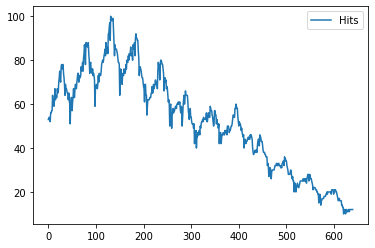

In [61]:
df.plot()

Text(0, 0.5, 'Hits')

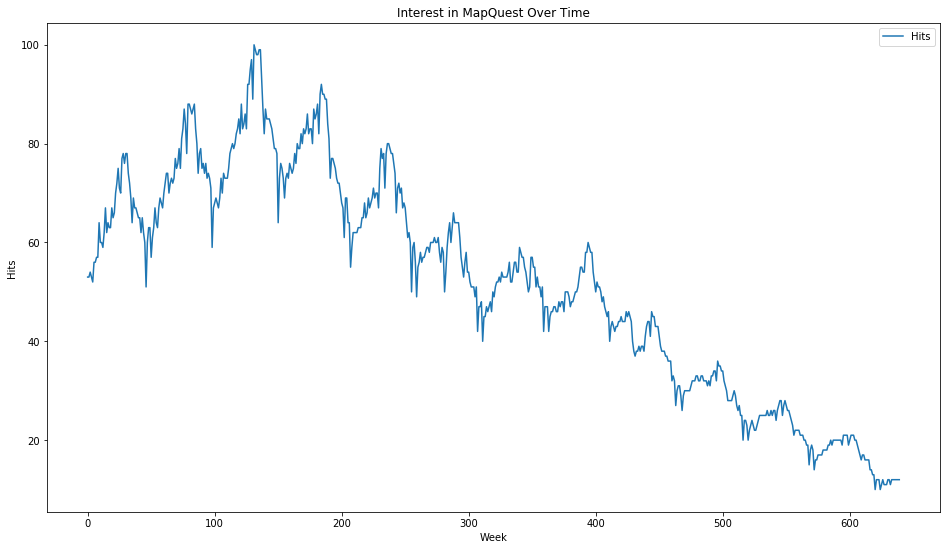

In [62]:
plt.rcParams['figure.figsize'] = [16,9]
ax = df.plot(title = 'Interest in MapQuest Over Time')
ax.set_xlabel('Week')
ax.set_ylabel('Hits')

In [63]:
line_coef = np.polyfit(df.index, df['Hits'],1)  # 1 is the order / degree number: = we are trying to fit a 
                                                # straight line = linear function 

In [64]:
line_coef

array([-0.10841388, 86.58979622])

In [65]:
# the slope is approx -0.11 and the intercept is approx 86.59

In [66]:
polynomial = np.poly1d(line_coef)

### Now, plot our trendline over the data

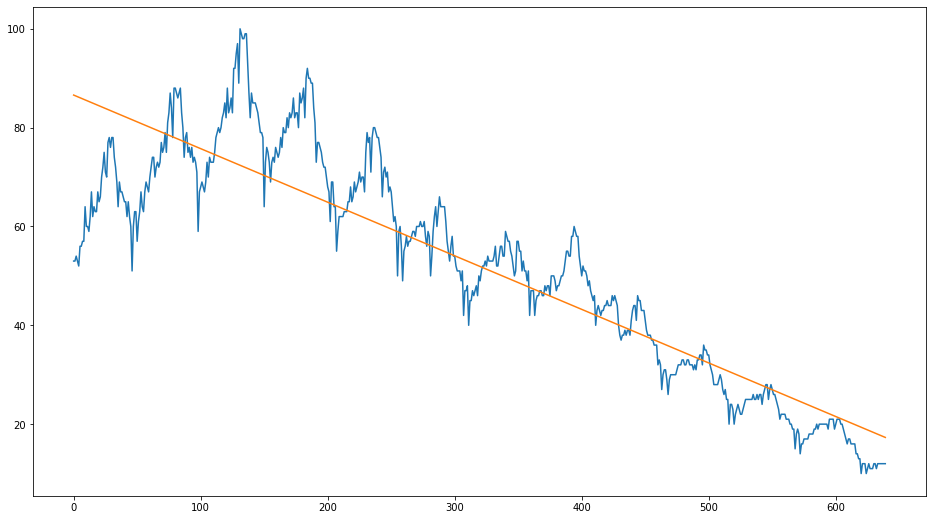

In [67]:
# plot the time series 

plt.plot(df.index, df['Hits'])

# plot the least squares minimizing line = line of best fit 

plt.plot(df.index, polynomial(df.index))

In [68]:
# lets see then if a quadratic would be a better fit for our data 

In [69]:
line_coef = np.polyfit(df.index, df['Hits'],2)  # 2: is the quadratic function

In [70]:
line_coef

array([-1.84964781e-04,  9.77861827e-03,  7.40219942e+01])

In [71]:
# a quadratic function has three coefficients: a, b and c

# a = quadratic term, this is the x^2, how norrow the U shape is 
# b = is the linear term 
# c = is the constant, y-intercept 

In [72]:
second_polynomial = np.poly1d(line_coef)

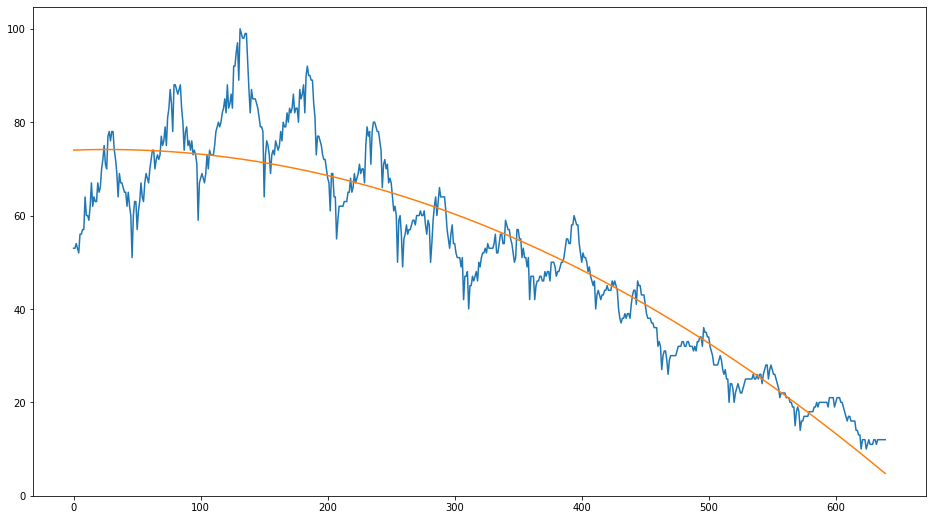

In [73]:
# plot the time series 

plt.plot(df.index, df['Hits'])

# plot the least squares minimizing line = line of best fit 

plt.plot(df.index, second_polynomial(df.index))

### Let's look for trends and seasonality in data made available by a German drugstore, Rossman

In [76]:
data = pd.read_csv('rossmann.csv')

# to solve warning message below can include, low_memory = False

In [77]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [78]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [79]:
data['Date'] = pd.to_datetime(data.Date)

In [80]:
data.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [81]:
data = data.set_index('Date')
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [82]:
# let's add a column for Year and Month based on the datetime index 

data['Year'] = data.index.year
data['Month'] = data.index.month

In [83]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [84]:
data.loc['2015-07-31' : '2014-07-31']

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7
...,...,...,...,...,...,...,...,...,...,...
2014-08-01,1111,5,5199,442,1,1,0,1,2014,8
2014-08-01,1112,5,10058,821,1,1,0,1,2014,8
2014-08-01,1113,5,7618,723,1,1,0,1,2014,8


In [85]:
data.filter(like = '2015-05', axis = 0).head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015,5
2015-05-31,2,7,0,0,0,0,0,0,2015,5
2015-05-31,3,7,0,0,0,0,0,0,2015,5
2015-05-31,4,7,0,0,0,0,0,0,2015,5
2015-05-31,5,7,0,0,0,0,0,0,2015,5


In [86]:
data.info

<bound method DataFrame.info of             Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-01   1111          2      0          0     0      0            a   
2013-01-01   1112          2      0          0     0      0            a   
2013-01-01   1113          2      0          0     0      0            a   
2013-01-01   1114          2      0          0     0      0            a   
2013-01-01   1115          2      0          0     0    

In [87]:
# we have more than 1 million dat points - lets narrow our focus by focusing on one store in particular

store1_data = data[data['Store'] == 1].copy()

In [88]:
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


### Plot the sales data

In [89]:
# let's investigate whether or not promotions affected sales. 

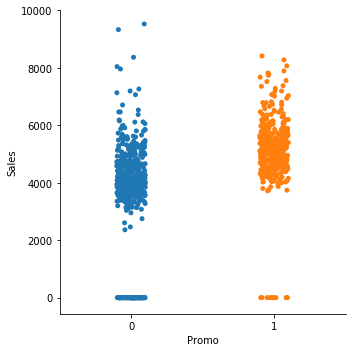

In [90]:
# we can use boxplots here - first we will use a scatter to visualise what is going on

sns.catplot(x = 'Promo', y = 'Sales', data = store1_data);

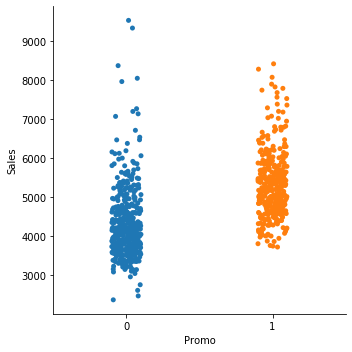

In [91]:
# filter the sales when the store was closed - to not skew our data 

sns.catplot(x = 'Promo', y = 'Sales', data = store1_data[store1_data['Open'] == 1]);

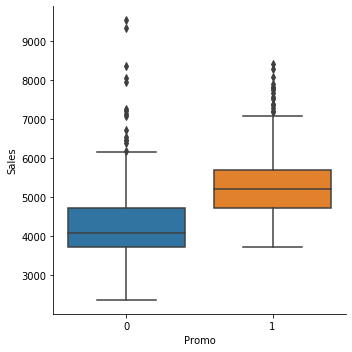

In [92]:
# we can plot a box plot 

sns.catplot(x = 'Promo', y = 'Sales', data = store1_data[store1_data['Open'] == 1], kind = 'box');

In [93]:
# does the day of the week influence the sales? 

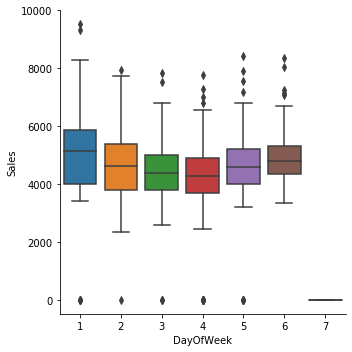

In [94]:
sns.catplot(x = 'DayOfWeek', y = 'Sales', data = store1_data, kind = 'box');

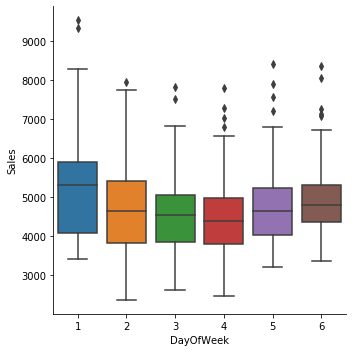

In [95]:
sns.catplot(x = 'DayOfWeek', y = 'Sales', data = store1_data[store1_data['Open'] ==1], kind = 'box');

In [96]:
# let's plot sales and customer visits over time

store1_open_data = store1_data[store1_data['Open'] == 1]

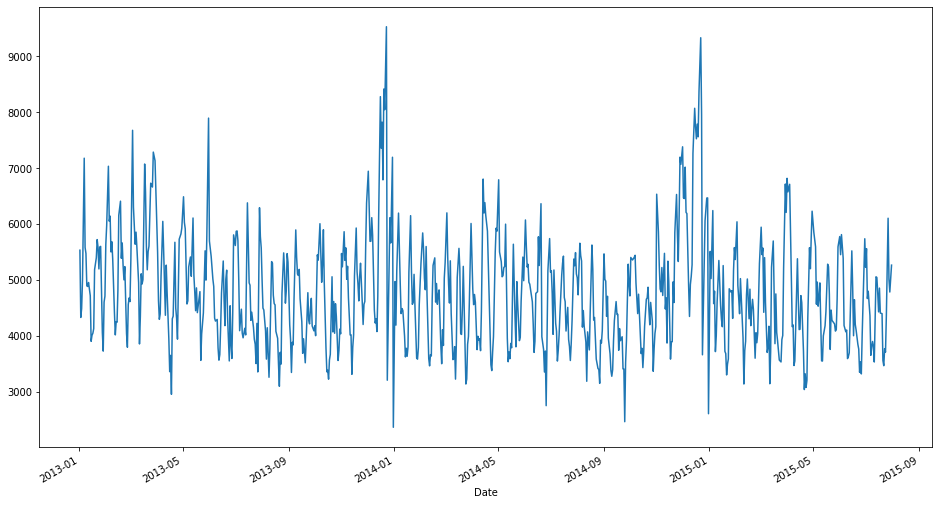

In [97]:
store1_open_data['Sales'].plot()

In [98]:
# doesn't seems to be a trend here, seasonality over Xmas though

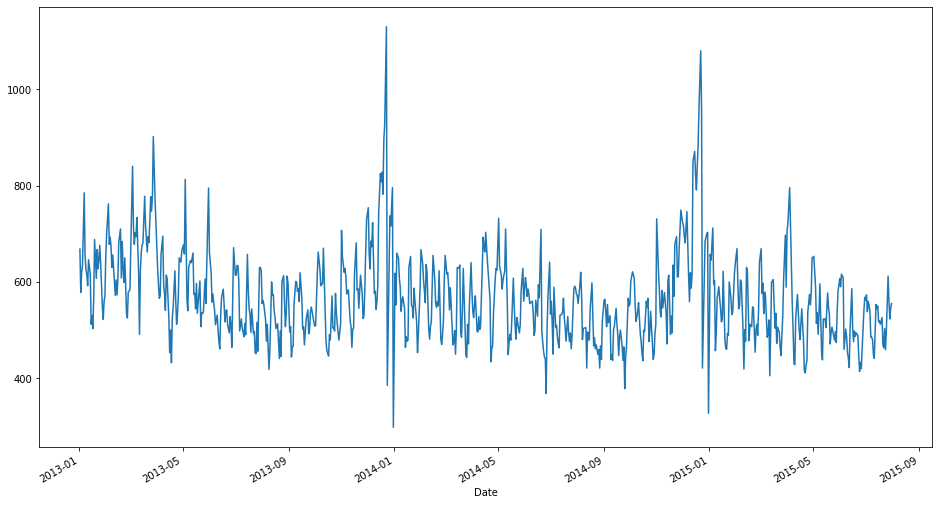

In [99]:
store1_open_data['Customers'].plot()

In [100]:
# seems to be some sort of seasonality and possibly even a downwards trend (almost)

In [101]:
store1_open_data_2015 = store1_open_data.loc['2015']

In [102]:
store1_open_data_2015.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


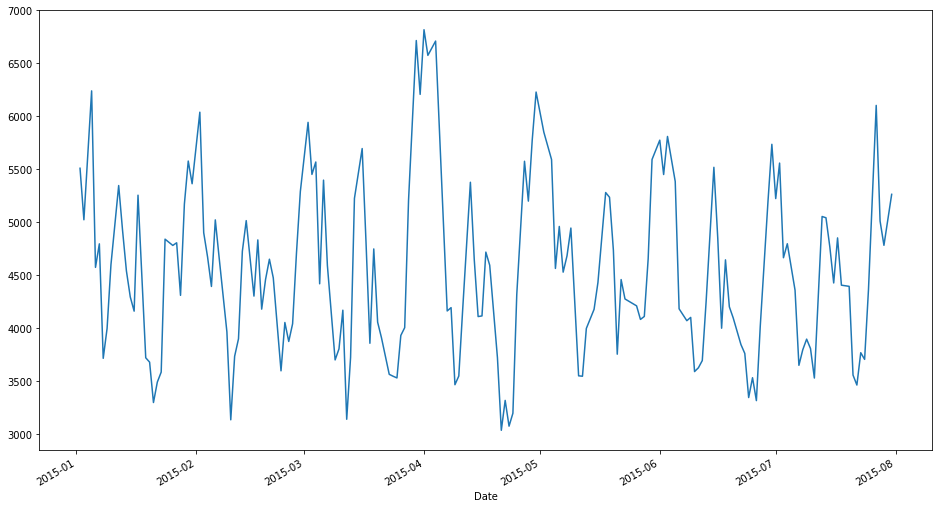

In [103]:
store1_open_data_2015['Sales'].plot()

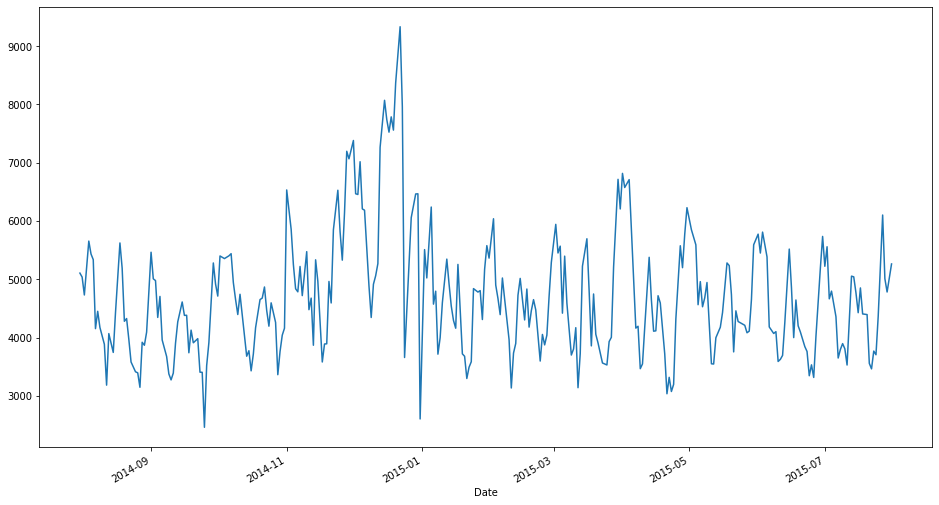

In [104]:
store1_open_data['Sales'].loc['2015-07-31' : '2014-07-31'].plot()

## Aggregate Data

In [105]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [107]:
data[['Sales']].resample('A').mean()   # 'D': day, 'W': week, 'M': month

,Sales
Date,
2013-12-31,5658.533675
2014-12-31,5833.290704
2015-12-31,5878.245380


In [108]:
data[['Sales']].resample('A').median()

,Sales
Date,
2013-12-31,5598
2014-12-31,5794
2015-12-31,5916


In [109]:
data[['Sales']].resample('A').sum()

,Sales
Date,
2013-12-31,2302876084
2014-12-31,2180804896
2015-12-31,1389499643


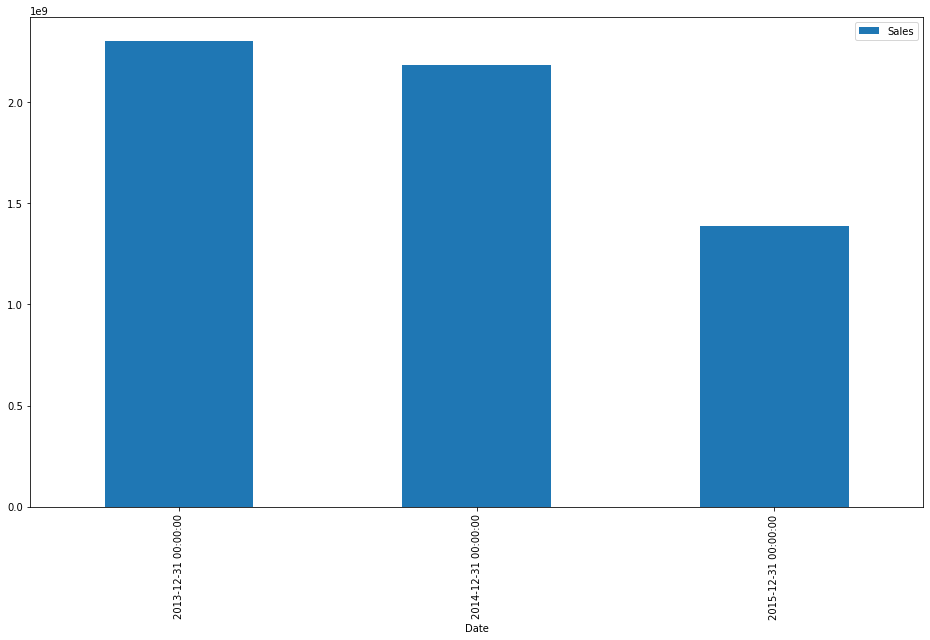

In [110]:
data[['Sales']].resample('A').sum().plot(kind = 'bar')

In [111]:
data[['Sales']].resample('M').sum()

,Sales
Date,
2013-01-31,180132207
2013-02-28,171534275
2013-03-31,201180369
2013-04-30,183431432
2013-05-31,185411063
2013-06-30,180702351
2013-07-31,208843882
2013-08-31,198042727
2013-09-30,178053963


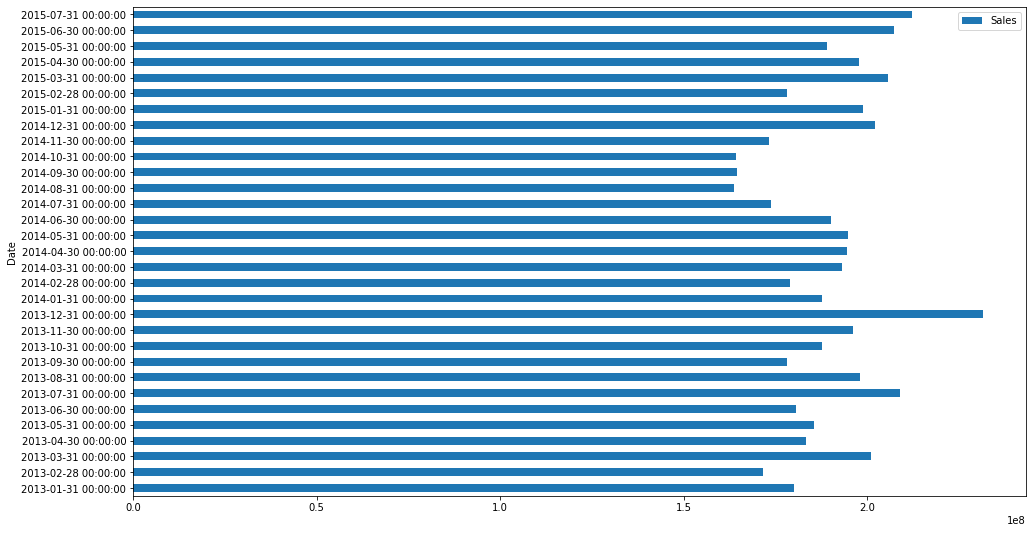

In [112]:
data[['Sales']].resample('M').sum().plot(kind = 'barh')

In [113]:
data[['Sales']].resample('D').sum()

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


## Section 2: Rolling  Statistics

### Calculating the rolling daily sum over all stores

In [114]:
data[['Sales']].resample('D').sum()

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


In [115]:
daily_store_sales = data[['Sales']].resample('D').sum()

In [118]:
daily_store_sales.rolling(window = 3, center = True).mean()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4.464961e+06
2013-01-03,6.645534e+06
2013-01-04,6.312789e+06
2013-01-05,4.244817e+06
...,...
2015-07-27,6.702743e+06
2015-07-28,9.440776e+06
2015-07-29,8.804630e+06


In [120]:
daily_store_sales.rolling(window = 3, center = True).mean()['2015']

# because the date is the index we can filter with [] at the end

,Sales
Date,
2015-01-01,3.862395e+06
2015-01-02,4.613968e+06
2015-01-03,4.636312e+06
2015-01-04,5.883770e+06
2015-01-05,6.097493e+06
...,...
2015-07-27,6.702743e+06
2015-07-28,9.440776e+06
2015-07-29,8.804630e+06


In [121]:
daily_store_sales.rolling(window = 7, center = True).mean()['2015']

,Sales
Date,
2015-01-01,4.698837e+06
2015-01-02,5.272034e+06
2015-01-03,5.147139e+06
2015-01-04,5.822320e+06
2015-01-05,6.896103e+06
...,...
2015-07-27,7.147148e+06
2015-07-28,7.648351e+06
2015-07-29,NaN


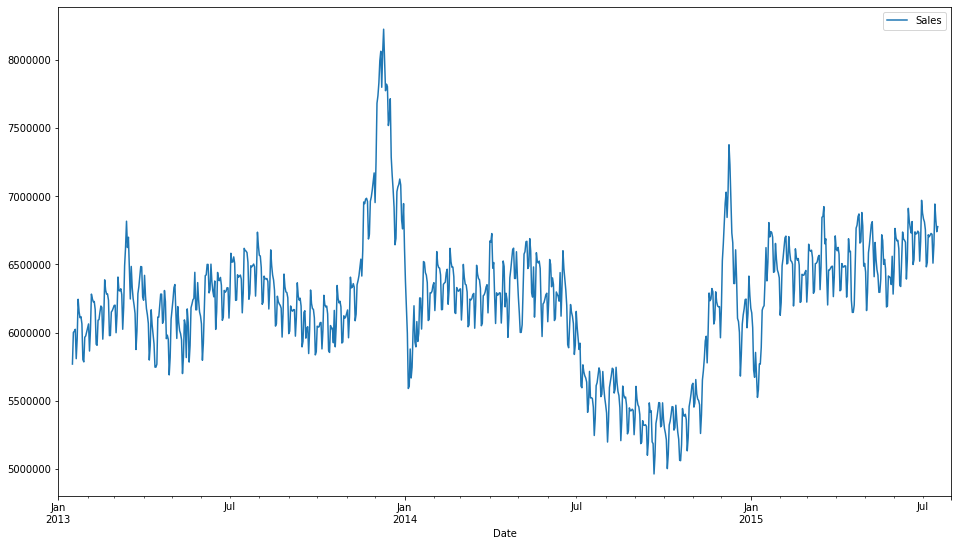

In [122]:
daily_store_sales.rolling(window = 30, center = True).mean().plot()

### The Expanding mean

In [123]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window = 1, center = False).mean()
expanding_mean = data.Sales.resample('Q').sum().expanding().mean()

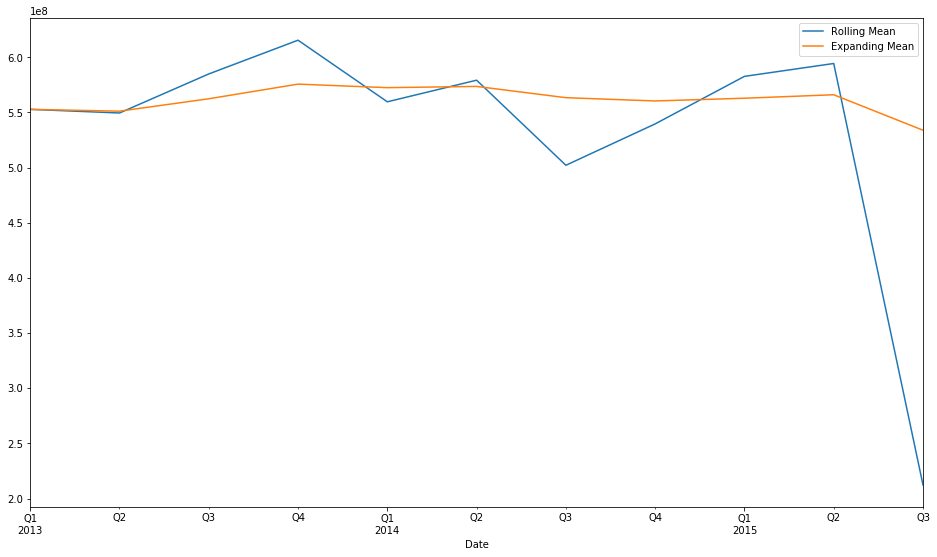

In [124]:
fig, ax = plt.subplots()
rolling_mean.plot(legend = True)
expanding_mean.plot(legend = True)
ax.legend(['Rolling Mean', 'Expanding Mean'])